In [1]:
from pathlib import Path
from json import dumps
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# This value can be changed to make calculations faster, but should not exceed 1.7
LEARNING_RATE = 0.1

# This value can be changed to make calculations more precise
ERROR = 1

# Show graph for this sequences of iterations
ITERATIONS = [1, 3, 7, 50, 100, 300, 600, 1000, 5000]
SHOW_GRAPH = True

1 iteration


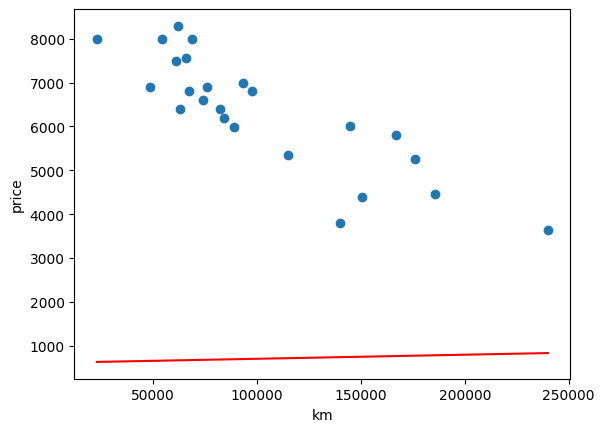

3 iteration


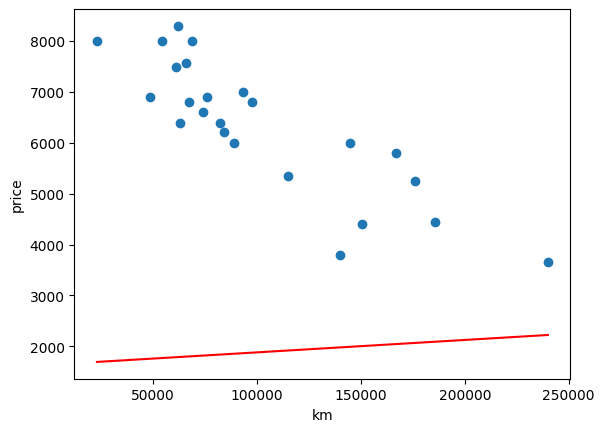

7 iteration


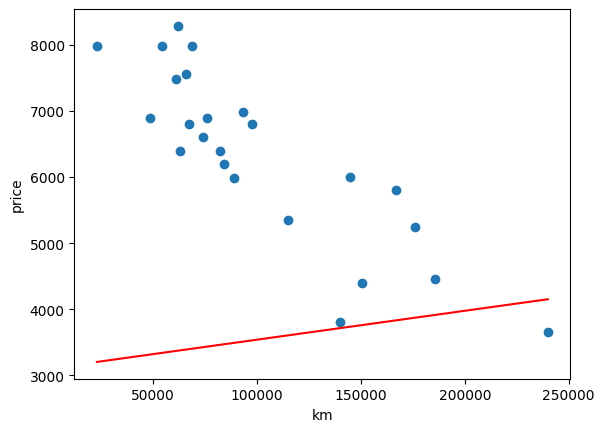

50 iteration


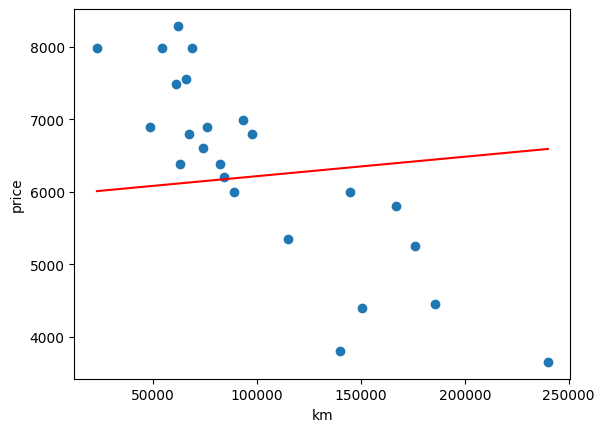

100 iteration


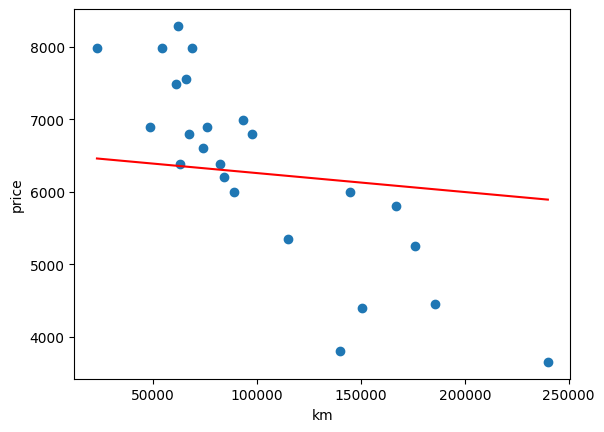

300 iteration


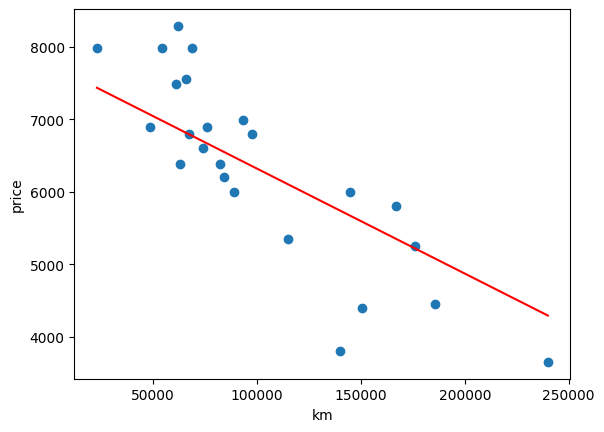

600 iteration


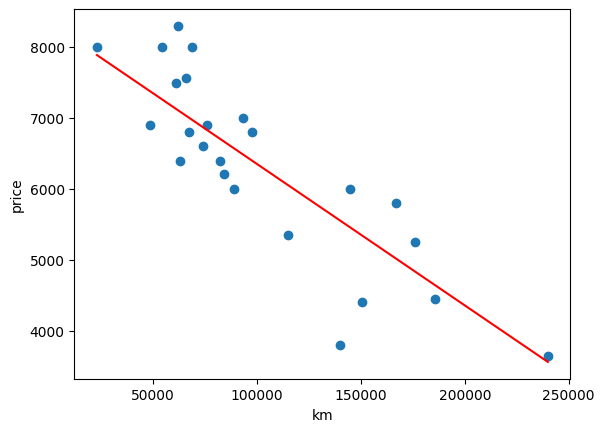

Last iteration


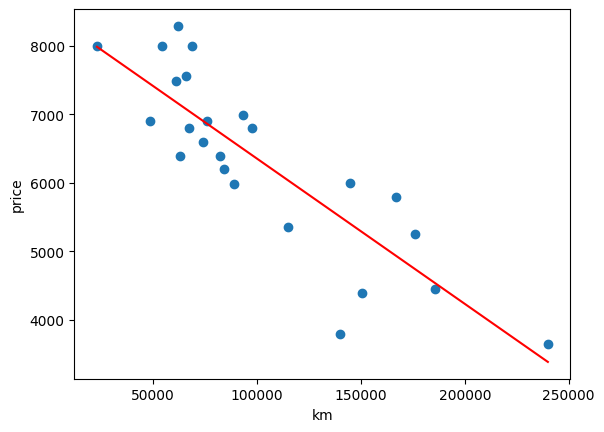

In [3]:


def estimated_price(t0, t1, km):
    return t1 * km + t0


def calculate_square_error(t0, t1, km, price) -> float:
    sum_ = sum([(estimated_price(t0, t1, x) - y) ** 2 for x, y in zip(km, price)])
    return sum_ / (2 * len(km))


def get_tmp_t0(t0, t1, km, price):
    size = len(km)
    sum_ = sum([estimated_price(t0, t1, km_i) - price_i for km_i, price_i in zip(km, price)])
    return (LEARNING_RATE / size) * sum_


def get_tmp_t1(t0, t1, km, price):
    size = len(km)
    sum_ = sum([(estimated_price(t0, t1, km_i) - price_i) * km_i for km_i, price_i in zip(km, price)])
    return (LEARNING_RATE / size) * sum_


def training(i, t0, t1, km, price):
    sq_er = calculate_square_error(t0, t1, km, price)
    while True:
        i += 1
        tmp_t0 = t0 - get_tmp_t0(t0, t1, km, price)
        tmp_t1 = t1 - get_tmp_t1(t0, t1, km, price)
        t0 = tmp_t0
        t1 = tmp_t1
        tmp_sq_er = calculate_square_error(t0, t1, km, price)
        if abs(tmp_sq_er - sq_er) < ERROR:
            return None, t0, t1
        sq_er = tmp_sq_er
        if i in ITERATIONS:
            return i, t0, t1


def train_model(t0: float, t1: float, km: np.ndarray, price: np.ndarray, km_init):
    i = 0
    while True:
        i, t0, t1 = training(i, t0, t1, km, price)
        if SHOW_GRAPH:
            def plot_data():
                plt.scatter(km_init, price)
                plt.xlabel("km")
                plt.ylabel("price")
            plot_data()
            t0_tmp, t1_tmp = denormalize_thetas(t0, t1, km_init)
            plt.plot([min(km_init), max(km_init) ], [estimated_price(t0_tmp, t1_tmp, min(km_init)), estimated_price(t0_tmp, t1_tmp, max(km_init))], color='r')
            iter = i if i else "Last"
            print(f'{iter} iteration')
            plt.show()

        if i is None:
            break
    return t0, t1


def normalize_data(data: np.ndarray):
    return (data - min(data)) / (max(data) - min(data))


def denormalize_thetas_negative(x, y):
    t0 = (max(y) * max(x) - min(y) * min(x)) / (max(x) - min(x))
    t1 = (min(y) - t0) / max(x)
    return t0, t1


def denormalize_thetas_positive(x, y):
    t0 = (max(y) * min(x) - min(y) * max(x)) / (min(x) - max(x))
    t1 = (min(y) - t0) / min(x)
    return t0, t1


def denormalize_thetas(t0, t1, km):
    y_min = estimated_price(t0, t1, 1)
    y_max = estimated_price(t0, t1, 0)
    if t1 < 0:
        t0, t1 = denormalize_thetas_negative(km, [y_min, y_max])
    else:
        t0, t1 = denormalize_thetas_positive(km, [y_min, y_max])
    return t0, t1


def calculate_thetas(km, price):
    km_n = normalize_data(km)
    t0, t1 = train_model(0.0, 0.0, km_n, price, km)
    return denormalize_thetas(t0, t1, km)


def show_graph(data):
    km = data[1:, 0]
    price = data[1:, 1]
    t0, t1 = calculate_thetas(km, price)

    if not SHOW_GRAPH:
        def plot_data():
            plt.scatter(km, price)
            plt.xlabel("km")
            plt.ylabel("price")

        plot_data()
        plt.plot([min(km), max(km) ], [estimated_price(t0, t1, min(km)), estimated_price(t0, t1, max(km))], color='r')
        plt.show()

p = Path('data.csv')
show_graph(np.genfromtxt(p, delimiter=','))



1 iteration


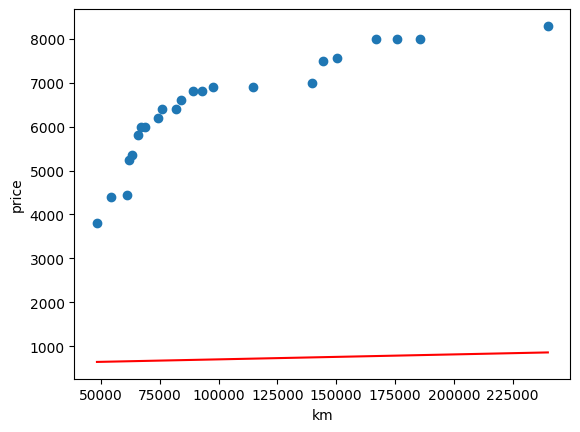

3 iteration


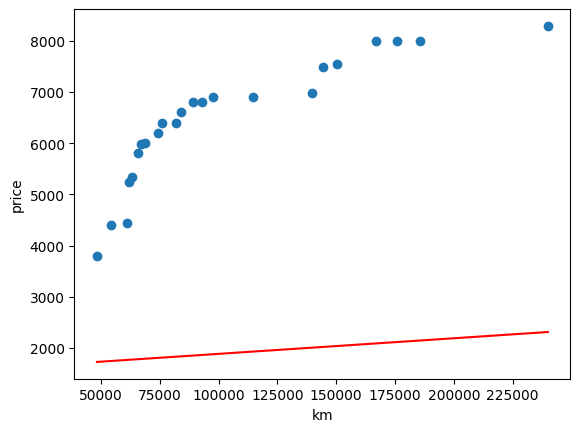

7 iteration


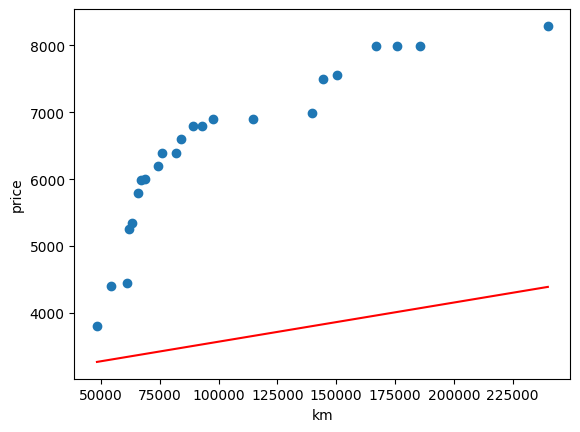

50 iteration


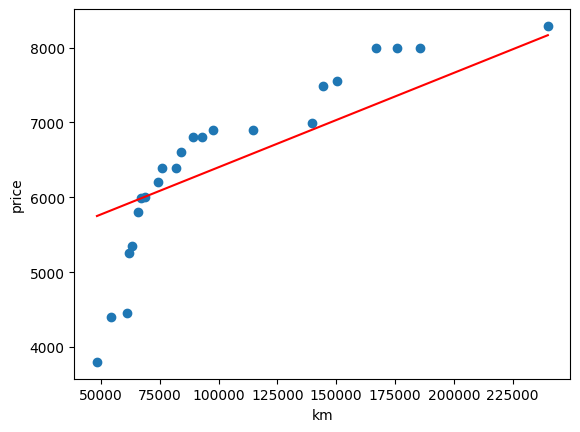

100 iteration


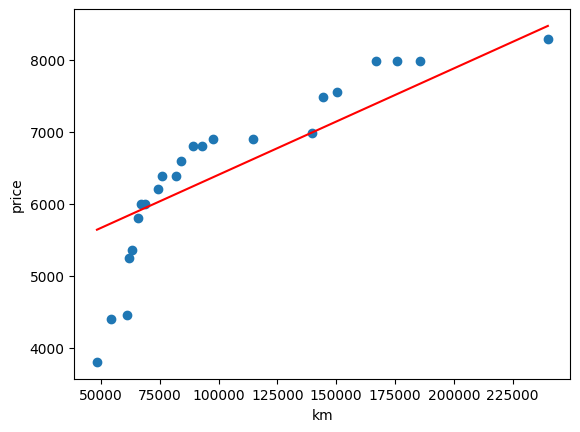

300 iteration


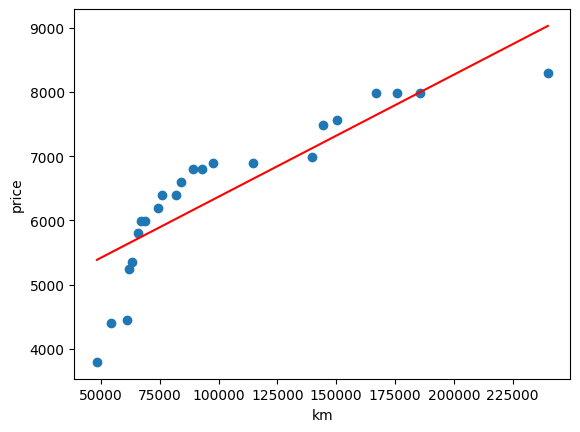

600 iteration


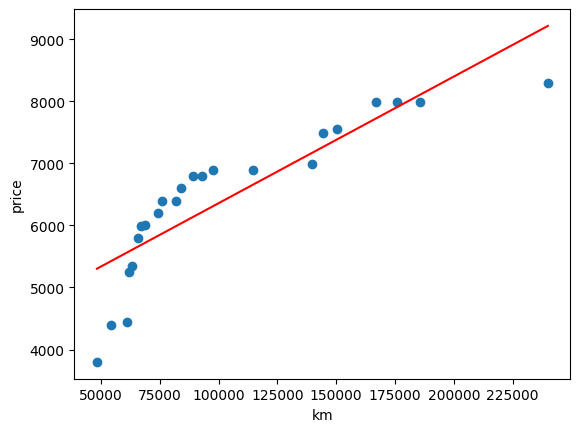

Last iteration


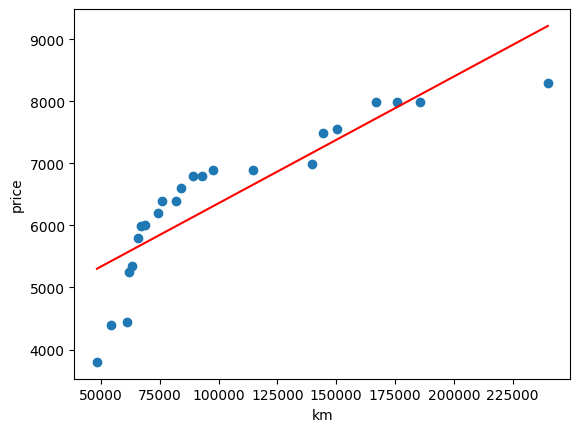

In [4]:
p = Path('data1.csv')
show_graph(np.genfromtxt(p, delimiter=','))